### Imports

In [6]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

### Linear squares fitting (exc. 46)

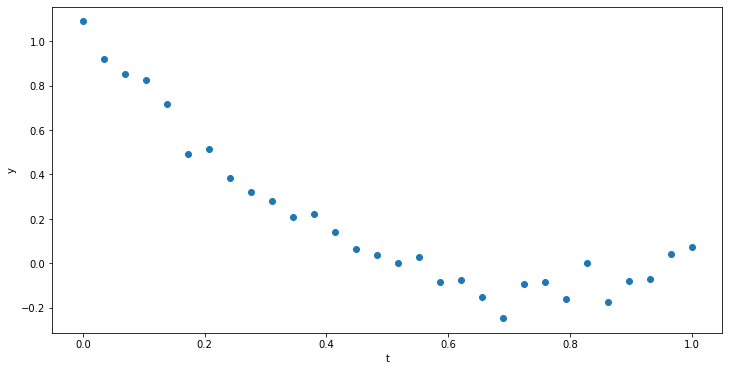

In [7]:
# set random seed
np.random.seed(0)

# 30 equidistant points between 0 and 1
t = np.linspace(0, 1, 30)
y = 2*t**2 - 3*t + 1 + 0.05*randn(len(t))

# plot data
plt.figure(figsize=(12, 6))
plt.plot(t, y, 'o')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

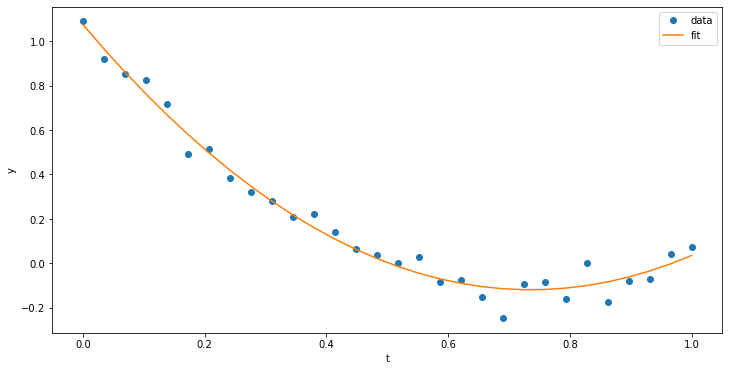

In [8]:
# define the model (matrix A, y = Ax, x = [a, b, c], A = [t**2, t, 1])
A = np.vstack([t**2, t, np.ones(len(t))]).T

# solve the linear system
x = np.linalg.lstsq(A, y, rcond=None)[0]

# plot the data and the model
plt.figure(figsize=(12, 6))
plt.plot(t, y, 'o', label='data')
plt.plot(t, np.dot(A, x), label='fit')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

### Exponential model (exc. 47)

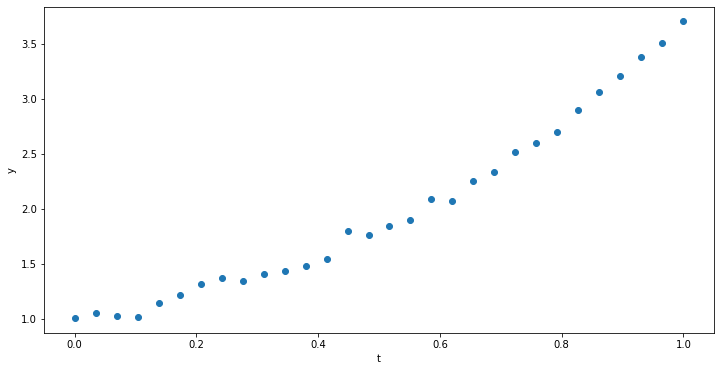

In [9]:
y = t * np.exp(t) + 1 + 0.05 * randn(len(t))

# plot data
plt.figure(figsize=(12, 6))
plt.plot(t, y, 'o')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

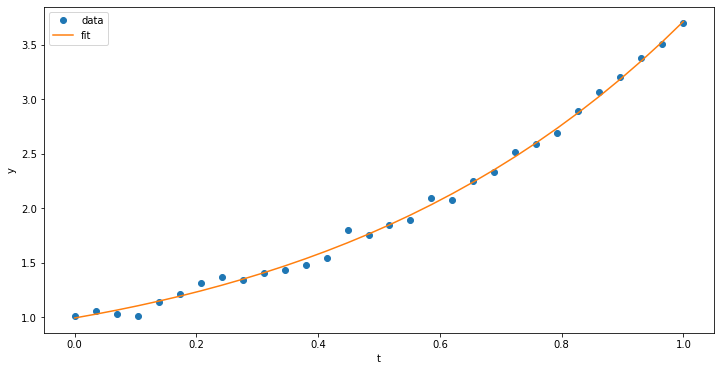

In [10]:
# define function of residuals
def fun(x, t, y):
    return x[0] * t * np.exp(x[1]*t) + x[2] - y

# initial guess
x0 = np.array([1, 1, 1])

# solve the non-linear least squares problem
res = least_squares(fun, x0, args=(t, y))
res.x

# plot the data and the model
plt.figure(figsize=(12, 6))
plt.plot(t, y, 'o', label='data')
plt.plot(t, fun(res.x, t, 0), label='fit')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()


### Regularized least squares (exc. 48)

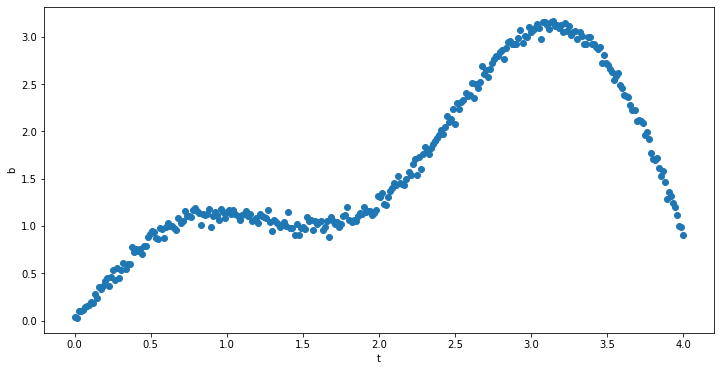

In [13]:
t = np.linspace(0, 4, 300)
b = np.sin(t) + t*(np.cos(t)**2) + 0.05*randn(len(t))

# plot data
plt.figure(figsize=(12, 6))
plt.plot(t, b, 'o')
plt.xlabel('t')
plt.ylabel('b')
plt.show()

Solve:

$\min _x\|x-b\|^2+\mu\|L x\|^2 \text { for } L=L_1$

First order condition:

$\frac{\partial}{\partial x}\left(\|x-b\|^2+\mu\|L x\|^2\right)=2 x-2 b+2\mu L^{\top} L x=0$

$\Rightarrow x=(I + \mu L^{\top} L)^{-1} b$

Matrix $L$ acts as a regularizer, for $L=L_1$ it penalizes the sum of absolute differences between consecutive elements of x.

$||L_1 x||^2 = \sum_{i=1}^{n-1} (x_i - x_{i+1})^2$
